# Spatiotemporal pattern

The Spatiotemporal Pattern function in SOAPy employs tensor decomposition to extract components from the three-order expression tensor (“Time-Space-Gene”), revealing hidden patterns and reducing the complexity of data explanation.
We used Nanosting DSP mouse developmental samples to explore the spatio-temporal developmental relationships of three major organs: heart, lung, and midgut.

Download 'Count Results' and 'Images' files from https://nanostring.com/products/geomx-digital-spatial-profiler/spatial-organ-atlas/mouse-development/.

## Read and preprocessing

In [1]:
import warnings
warnings.filterwarnings("ignore")
import SOAPy_st as sp
import scanpy as sc
import numpy as np

In [2]:
adata = sp.pp.read_dsp2adata(
    xml_file={
        'mu_dev_E9_001': '/csb2/project/tmp_download/GeoMx_MouseDevelopment/image_files/mu_dev_E9_image_files/mu_dev_E9_001.ome.xml',
        # The reason is that the keywords in the xml file of mu_dev_E9_002 are different from other .xml files. 
        # If you want to read the mu_dev_E9_002 .xml file together, you need to change the "Polyline" to "Polygon" in the mu_dev_E9_002.ome.xml file.
        'mu_dev_E9_003': '/csb2/project/tmp_download/GeoMx_MouseDevelopment/image_files/mu_dev_E9_image_files/mu_dev_E9_003.ome.xml',
        'mu_dev_E11_004': '/csb2/project/tmp_download/GeoMx_MouseDevelopment/image_files/mu_dev_E11_image_files/mu_dev_E11_004.ome.xml',
        'mu_dev_E11_005': '/csb2/project/tmp_download/GeoMx_MouseDevelopment/image_files/mu_dev_E11_image_files/mu_dev_E11_005.ome.xml',
        'mu_dev_E13_006': '/csb2/project/tmp_download/GeoMx_MouseDevelopment/image_files/mu_dev_E13_image_files/mu_dev_E13_006.ome.xml',
        'mu_dev_E13_007': '/csb2/project/tmp_download/GeoMx_MouseDevelopment/image_files/mu_dev_E13_image_files/mu_dev_E13_007.ome.xml',
        'mu_dev_E13_008': '/csb2/project/tmp_download/GeoMx_MouseDevelopment/image_files/mu_dev_E13_image_files/mu_dev_E13_008.ome.xml',
        'mu_dev_E13_009': '/csb2/project/tmp_download/GeoMx_MouseDevelopment/image_files/mu_dev_E13_image_files/mu_dev_E13_009.ome.xml',
        'mu_dev_E13_010': '/csb2/project/tmp_download/GeoMx_MouseDevelopment/image_files/mu_dev_E13_image_files/mu_dev_E13_010.ome.xml',
        'mu_dev_E13_011': '/csb2/project/tmp_download/GeoMx_MouseDevelopment/image_files/mu_dev_E13_image_files/mu_dev_E13_011.ome.xml',
        'mu_dev_E15_012': '/csb2/project/tmp_download/GeoMx_MouseDevelopment/image_files/mu_dev_E15_image_files/mu_dev_E15_012.ome.xml',
        'mu_dev_E15_013': '/csb2/project/tmp_download/GeoMx_MouseDevelopment/image_files/mu_dev_E15_image_files/mu_dev_E15_013.ome.xml'
    },
    information_file='/csb2/project/SpatialPackage_whq/Tutorial/data/nanostring_growth/Export4_NormalizationQ3.xlsx',
)

Firstly, the AOI of the three organs were extracted in adata.

In [3]:
adata = adata[np.isin(adata.obs['Tissue'], ['Heart', 'Lung', 'Midgut']), :].copy()

In [4]:
sc.pp.log1p(adata)
# sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=1000)
# adata = adata[:, adata.var['highly_variable'] == True].copy()

adata.obs['Tissue_s'] = adata.obs['Tissue'].astype(str) + ' ' + adata.obs['Tissue_substructure'].astype(str)


## Tensor decomposition

In the following, 3D-tensor is constructed by subtissues, time points, and genes. 

Tensors can be generated automatically by `sp.tl.TensorDecomposition()` and contain gene information by default, only requiring the user to provide labels for other dimensions.

In [5]:
tensor = sp.tl.TensorDecomposition()
tensor.tensor_with_gene(adata, obs_factor=['Tissue_s', 'Timepoint'])

The first 1000 hypervariable genes are selected and standardized, and then the nonnegative CANDECOMP/PARAFAC(CP) tensor with rank 7 is decomposed by `Tensor.cp_decomposition()` to obtain the factor matrix and weight of the 7 factors.

In [6]:
tensor.highly_variable(factor_name='gene', top_num=1000) # select 1000 high variable genes
tensor.normalization(factor_name='gene', method='max') # normalization used the maximum value
weights, factors, nre = tensor.CP_decomposition(rank=7, non_negative=True, random_state=10, use_hals=True)

## Visualizing the results

Three bars show the composition of subtissues, time points, and genes within each factor.

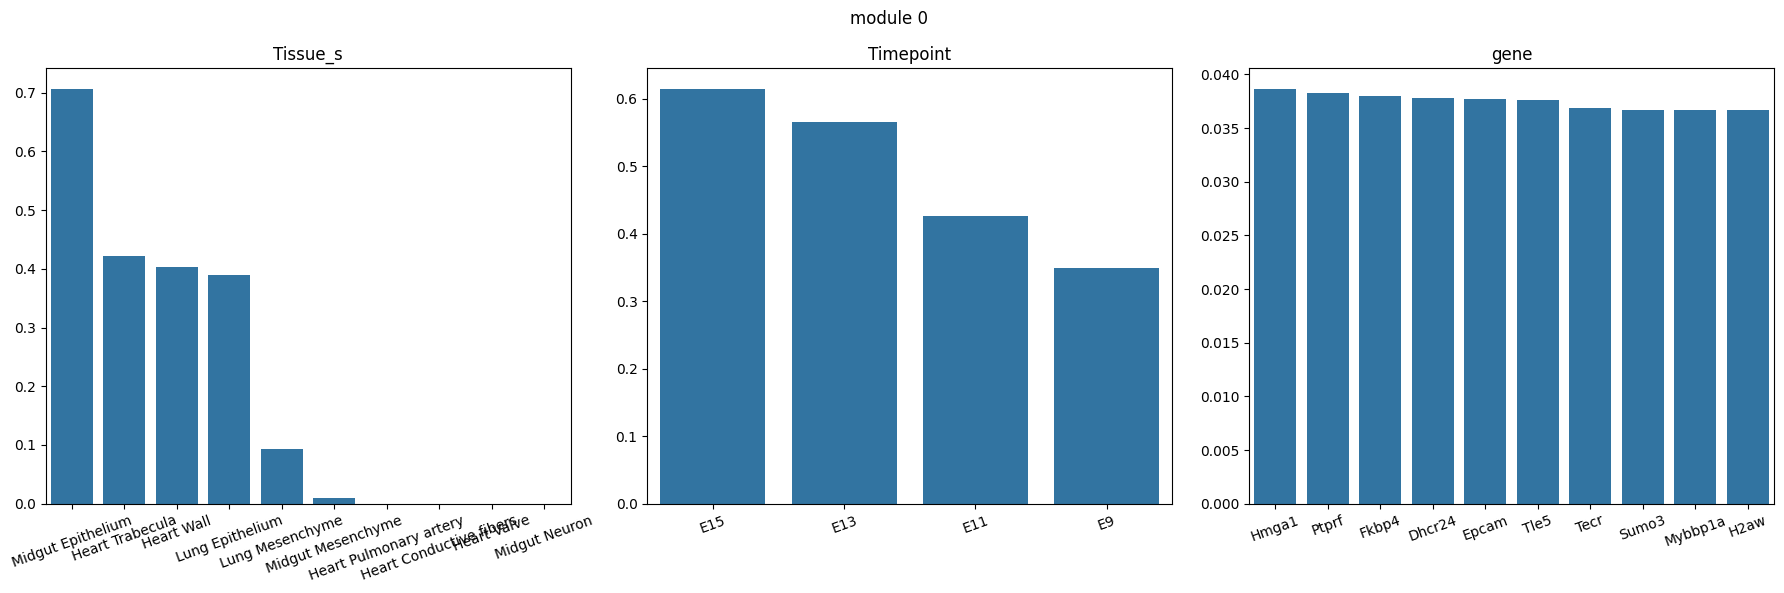

In [7]:
sp.pl.show_proportion_in_CP(tensor, module=0, max_key=10)

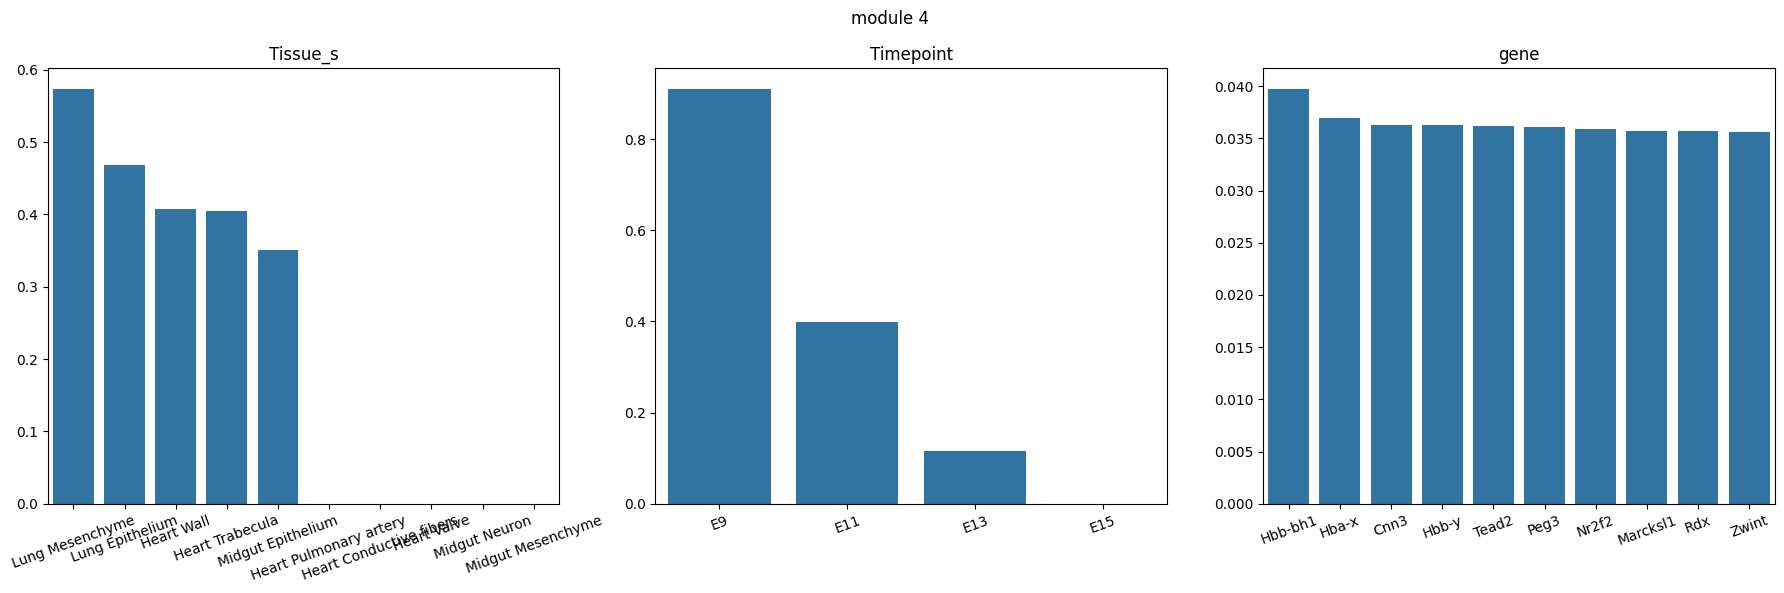

In [8]:
sp.pl.show_proportion_in_CP(tensor, module=4, max_key=10)